In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')


In [3]:
data.shape

(5656458, 6)

In [5]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [6]:
#How many unique countries are there?
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [10]:
# How many country codes are there
country_code = data['CountryCode'].unique().tolist()
len(country_code)

247

In [11]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## How many years of data fo we have?

In [12]:
# How many years of data fo we have?
years = data['Year'].unique().tolist()
len(years)

56

## What is the range of years?

In [13]:
print(min(years),"to", max(years))

1960 to 2015


## Matplotlib: Basic plotting, Part 1

In [6]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [7]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


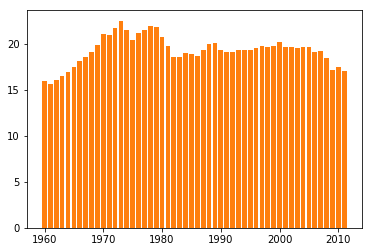

In [9]:
#get the years
years = stage['Year'].values
#get the values
co2= stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

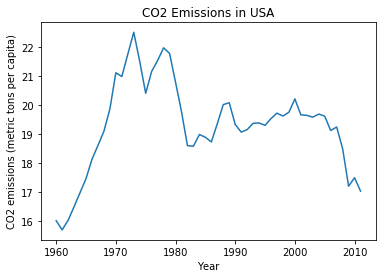

In [10]:
#switching to line plot
plt.plot(stage['Year'].values, stage['Value'].values)

#Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.title('CO2 Emissions in USA')
plt.show()


Histograms

In [12]:
hist_data = stage['Value'].values

In [13]:
print(len(hist_data))

52


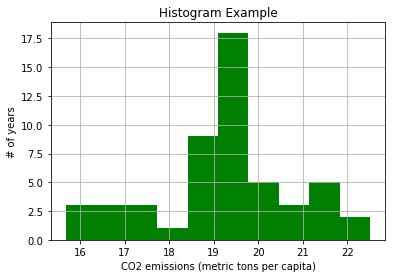

In [26]:
plt.hist(hist_data,10,normed=False,facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [21]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#apply masks
co2_2011 = data[mask1&mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [22]:
print(len(co2_2011))

232


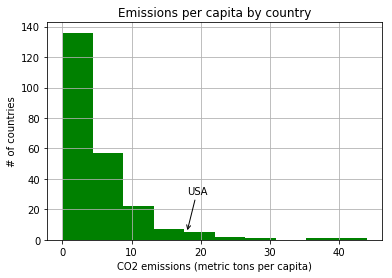

In [25]:
fig, ax = plt.subplots()

ax.annotate("USA", xy=(18,5),xycoords='data',
            xytext=(18,30),textcoords='data',
           arrowprops=dict(arrowstyle="->",connectionstyle='arc3'),)
plt.hist(co2_2011['Value'],10,normed=False,facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.title('Emissions per capita by country')

plt.grid(True)
plt.show()